# ASSIGNMENT ONE
1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

In [1]:
import numpy as np
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import seaborn as sns 
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize

In [2]:
df = pd.read_csv('Elon_musk.csv', encoding='Latin-1')
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [3]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
nltk.data.path.append('/Users/Haribparol/nltk_data/')
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [5]:
senti=pd.read_csv('all_words.csv',encoding ='Latin-1') 
senti.head()

,word,value
0,faced,-2
1,faces,-2
2,abnormal,-1
3,abolish,-1
4,abominable,-1


In [6]:
lm = WordNetLemmatizer()
df= [Text.strip() for Text in df.Text] 
df=[Text for Text in df if Text]
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [7]:
df=' '.join(df)
df

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [8]:
tokenizer= TweetTokenizer(strip_handles=True)
tweet_tokens=tokenizer.tokenize(df)
print(tweet_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [9]:
#Joining the list into one string/text
tweet_token_join=' '.join(tweet_tokens)
tweet_token_join

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [10]:
# Remove Punctuations 
remove_punctuation=tweet_token_join.translate(str.maketrans('','',string.punctuation))
remove_punctuation

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [11]:
# remove https or url within text
clean_df=re.sub(r'http\S+', '', remove_punctuation)
clean_df

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [12]:
nltk.download('punkt')
text_tokens=word_tokenize(clean_df)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/haribparol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
len(text_tokens)

17847

In [14]:
# Removing  Stopwords
no_stop_tokens=[word for word in text_tokens if not word in stopwords]
print(no_stop_tokens)

['I', '\x92', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', '\x92', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'U0001F923', 'U0001F923', 'This', 'true', 'power', 'haha', 'Any', 'crypto', 'wallet', '\x92', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway'

In [15]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[50:100])

['just', 'agree', 'clubhouse', 'it', '\x92', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', '\x92', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first']


In [16]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

i  alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it  getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account u0001f923 u0001f923 this true power haha any crypto wallet  give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it  meant price countries only differe

In [17]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['I', '\x92', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', '\x92', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', '\x92', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission

In [18]:
clean_txt=' '.join(lemmas)
clean_txt

'I \x92 alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it \x92 get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account u0001f923 u0001f923 this true power haha any crypto wallet \x92 give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it \x92 mean price country only difference taxis ship this inten

In [19]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)

{'alien': 194, 'ray': 2348, 'trace': 3013, 'cyberpunk': 768, 'hdr': 1358, 'nextlevel': 1960, 'have': 1353, 'try': 3044, 'great': 1305, 'interview': 1556, 'doge': 891, 'underestimate': 3179, 'congratulation': 675, 'tesla': 2918, 'china': 584, 'amazing': 217, 'execution': 1059, 'last': 1639, 'year': 3396, 'now': 1988, 'next': 1959, 'even': 1033, 'happy': 1340, 'new': 1957, 'ox': 2089, 'frodo': 1207, 'underdoge': 3178, 'all': 197, 'thought': 2955, 'would': 3381, 'fail': 1093, 'himself': 1402, 'haha': 1328, 'thank': 2929, 'indeed': 1497, 'tweet': 3060, 'definitely': 805, 'represent': 2415, 'realworld': 2363, 'time': 2971, 'allocation': 199, 'the': 2934, 'entertaining': 1003, 'outcome': 2068, 'likely': 1694, 'just': 1598, 'send': 2558, 'agree': 179, 'clubhouse': 613, 'it': 1575, 'get': 1266, 'real': 2358, 'buy': 502, 'dogecoin': 893, 'lil': 1695, 'toddler': 2983, 'hodler': 1408, 'he': 1359, 'issue': 1574, 'sentencing': 2563, 'seem': 2550, 'bit': 418, 'high': 1393, 'fix': 1153, 'please': 218

In [20]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
print(tweetscv.toarray().shape)

(12112, 3416)


# CountVectorizer with N-grams (Bigrams & Trigrams)

In [22]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [23]:

print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:

tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [25]:
print(tfidf_matix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


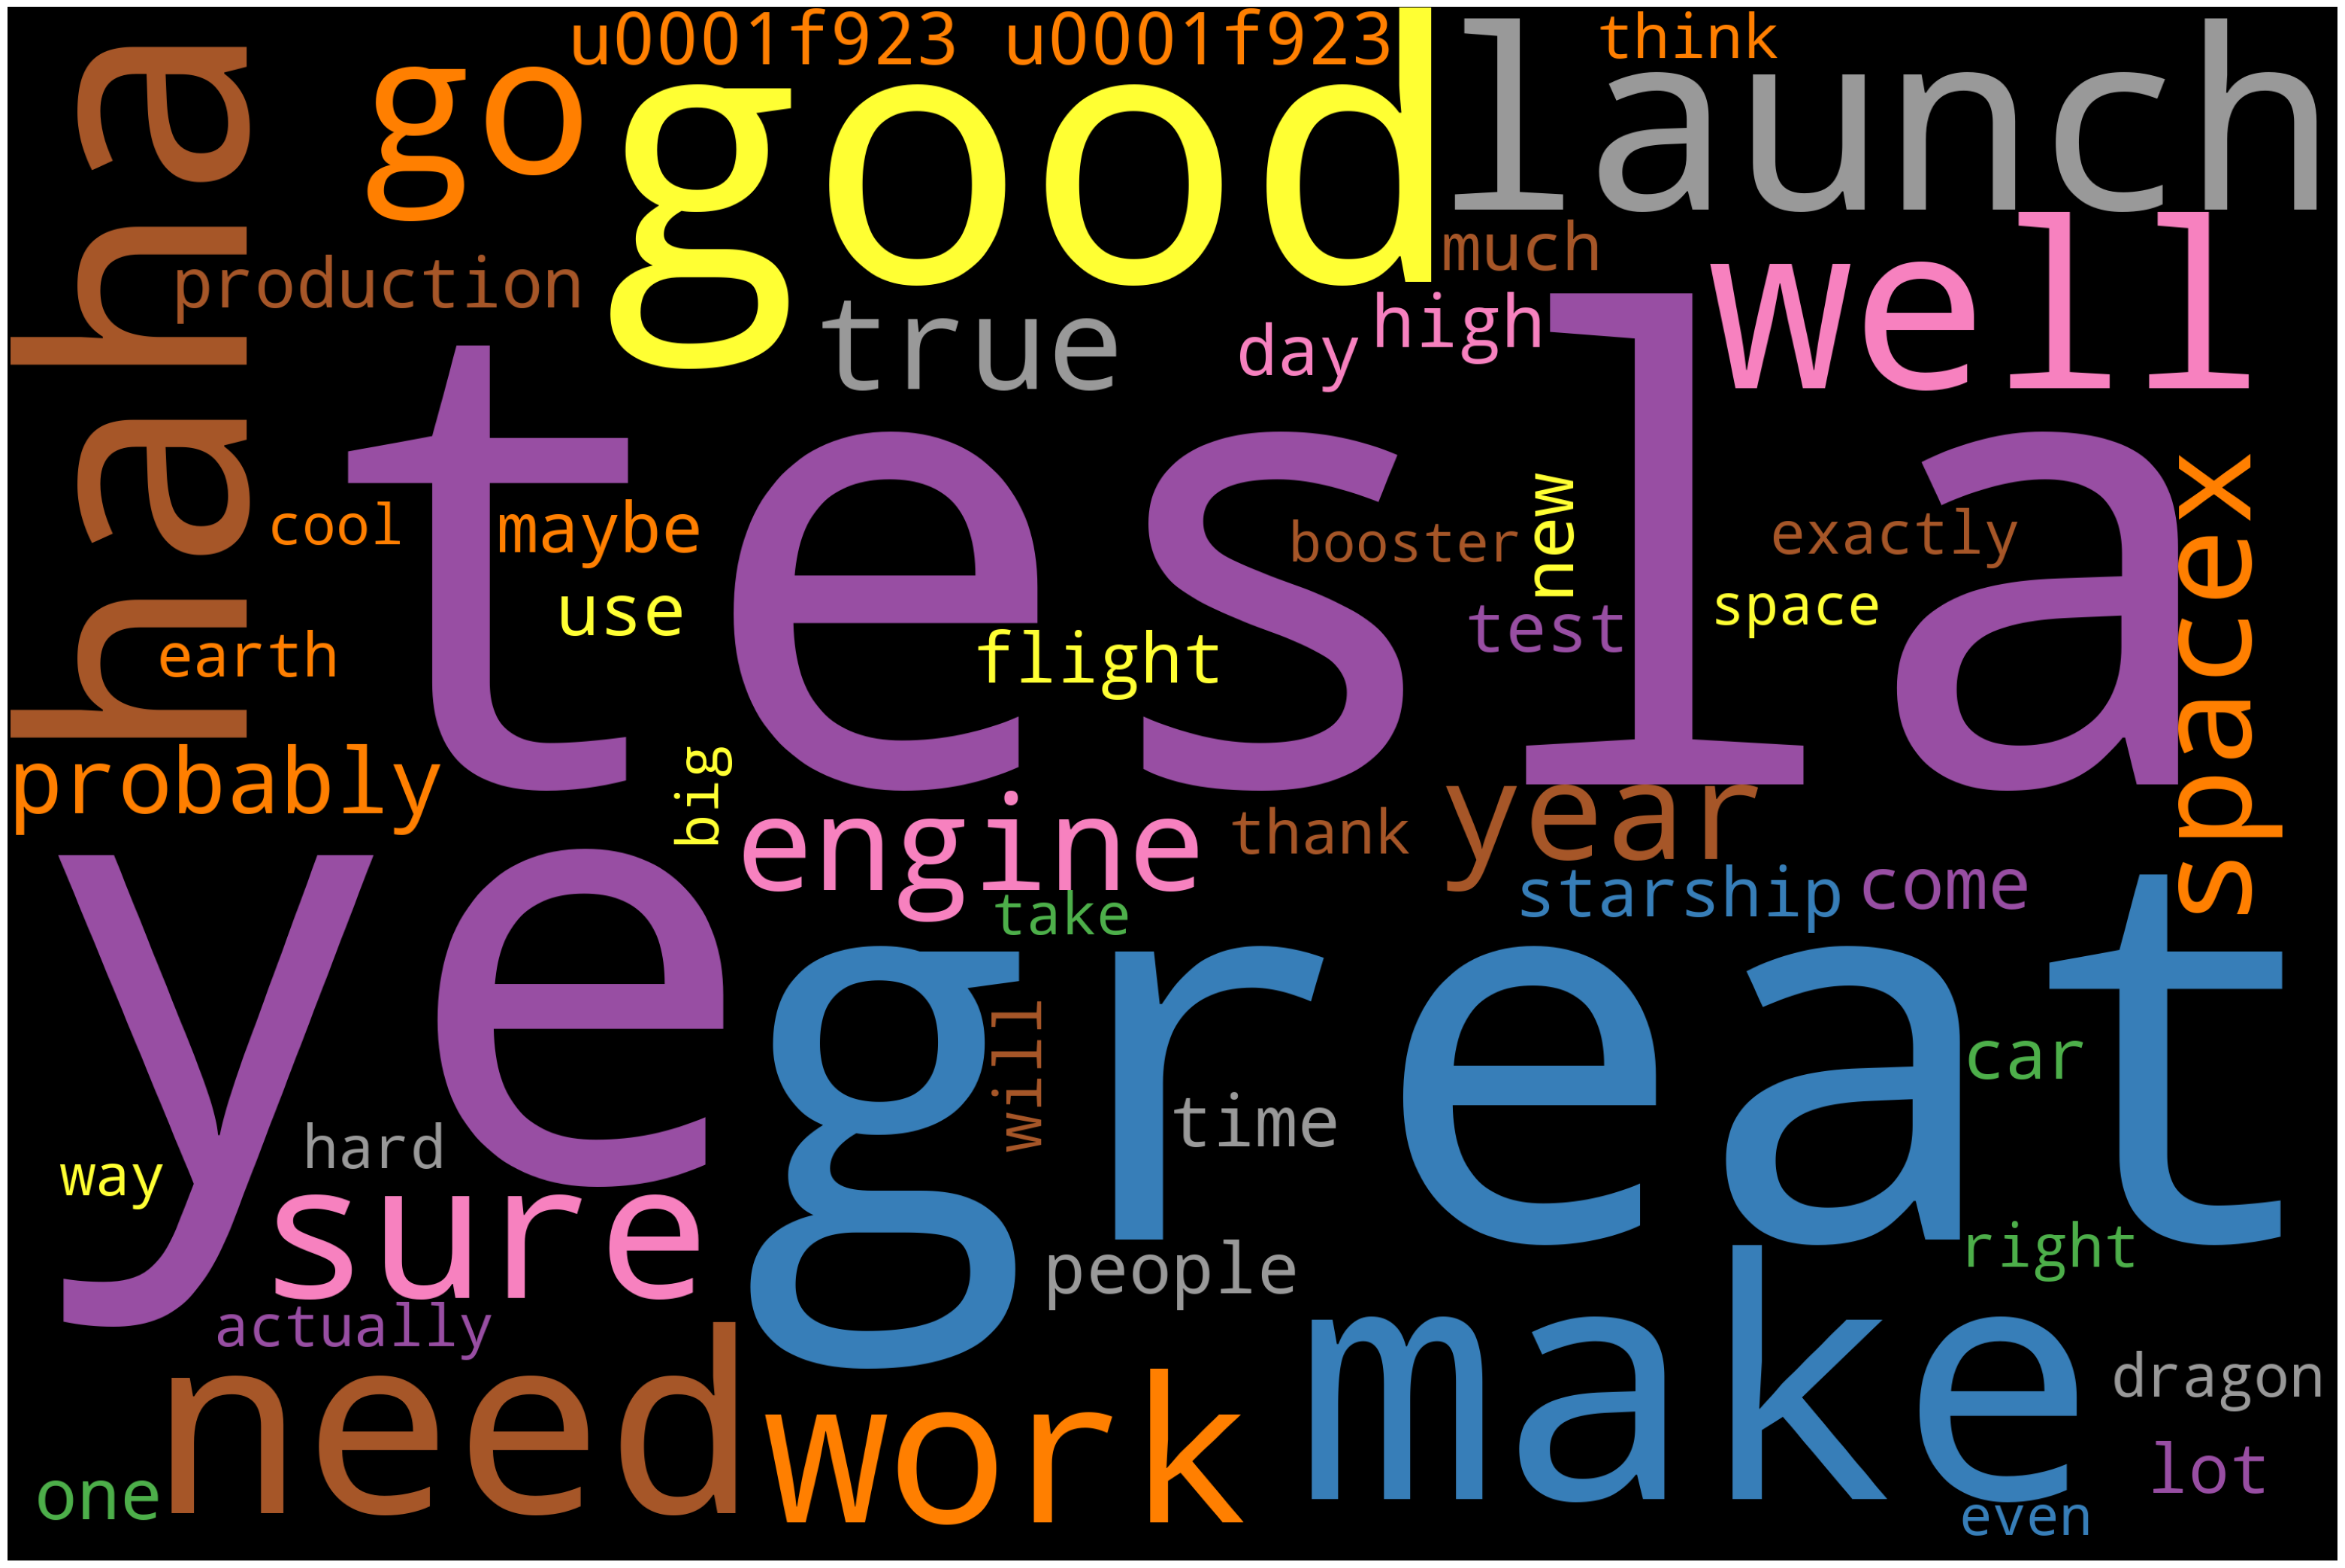

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud
STOPWORDS.update(['pron', 'rt', 'yeah'])
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=50,
                      colormap='Set1', stopwords=STOPWORDS).generate(clean_txt)
plot_cloud(wordcloud)


In [27]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_txt
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [28]:
for token in doc_block[100:200]:
    print(token,token.pos_)    

two NUM
element NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
yes INTJ
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
ipo PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex VERB
need AUX
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADP
it PRON
 PROPN
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mar PROPN
u0001f923 PROPN
u0001f923 PROPN
xprize NOUN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
I PRON
take VERB
table NOUN
that SCONJ
 PROPN
 PROPN
miss VERB
back ADP
work NOUN
I PRON
go VERB
do AUX
seem VER

In [29]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['fix', 'unit', 'time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'video', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'rainforest', 'come', 'fun', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'risk']


In [30]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,tesla,78
1,make,64
2,launch,62
3,year,49
4,work,48
5,go,45
6,need,45
7,come,42
8,day,38
9,get,37


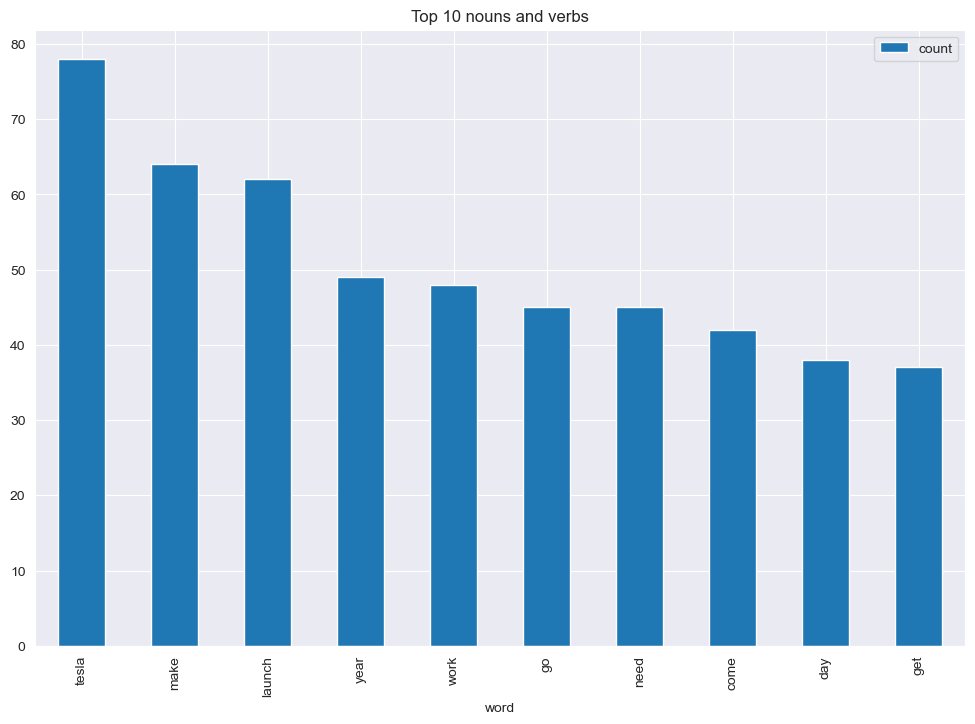

In [31]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# EMOTION MINING 

In [32]:
df

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [33]:
#Emotion Mining - Sentiment Analysis

sentences=tokenize.sent_tokenize(''.join(df))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [34]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [36]:
sentiment=pd.read_csv("all_words.csv",encoding="latin1")

In [37]:
sentiment.head()

,word,value
0,faced,-2
1,faces,-2
2,abnormal,-1
3,abolish,-1
4,abominable,-1


In [38]:
affinity_scores=sentiment.set_index('word')['value'].to_dict()
affinity_scores

{'faced': -2,
 'faces': -2,
 'abnormal': -1,
 'abolish': -1,
 'abominable': -1,
 'abominably': -1,
 'abominate': -1,
 'abomination': -1,
 'abort': -1,
 'aborted': -1,
 'aborts': -1,
 'abrade': -1,
 'abrasive': -1,
 'abrupt': -1,
 'abruptly': -1,
 'abscond': -1,
 'absence': -1,
 'absent-minded': -1,
 'absentee': -1,
 'absurd': -1,
 'absurdity': -1,
 'absurdly': -1,
 'absurdness': -1,
 'abuse': -1,
 'abused': -1,
 'abuses': -1,
 'abusive': -1,
 'abysmal': -1,
 'abysmally': -1,
 'abyss': -1,
 'accidental': -1,
 'accost': -1,
 'accursed': -1,
 'accusation': -1,
 'accusations': -1,
 'accuse': -2,
 'accuses': -2,
 'accusing': -2,
 'accusingly': -2,
 'acerbate': -2,
 'acerbic': -2,
 'acerbically': -2,
 'ache': -2,
 'ached': -2,
 'aches': -2,
 'achey': -2,
 'aching': -2,
 'acrid': -2,
 'acridly': -2,
 'acridness': -2,
 'acrimonious': -2,
 'acrimoniously': -1,
 'acrimony': -1,
 'adamant': -1,
 'adamantly': -1,
 'addict': -1,
 'addicted': -1,
 'addicting': -1,
 'addicts': -1,
 'admonish': -1,
 '

In [39]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text.lower())  # convert text to lowercase and use Spacy's lemmatization
        sent_score = sum([sentiment_lexicon.get(word.lemma_, 0) for word in sentence if not word.is_stop])
        # use list comprehension to calculate sentiment score and exclude stopwords
    return sent_score

In [40]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      2
3      8
4      0
      ..
922    0
923   -2
924    0
925    0
926   -9
Name: sentiment_value, Length: 927, dtype: int64

In [41]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
922    11
923    31
924     3
925    47
926    15
Name: word_count, Length: 927, dtype: int64

In [42]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
889,This is primarily an electrical/electronic (ch...,-16,69
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-15,60
765,A full blown Starship and SuperHeavy will be h...,-13,36
393,Transferring propellant https://t.co/vPIIPpDV...,-10,39
331,"Their main PCR search is for the N1 gene, uniq...",-9,28
...,...,...,...
301,It was designed from the beginning with human ...,15,64
561,Starship SN8 with rear body flaps https://t.co...,15,82
185,Theres some great AI out ther https://t.co/v...,16,48
744,If this rate of improvement https://t.co/kTpP...,16,76


In [43]:
sent_df['sentiment_value'].describe()

count    927.000000
mean       1.360302
std        3.902380
min      -16.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       29.000000
Name: sentiment_value, dtype: float64

<Axes: >

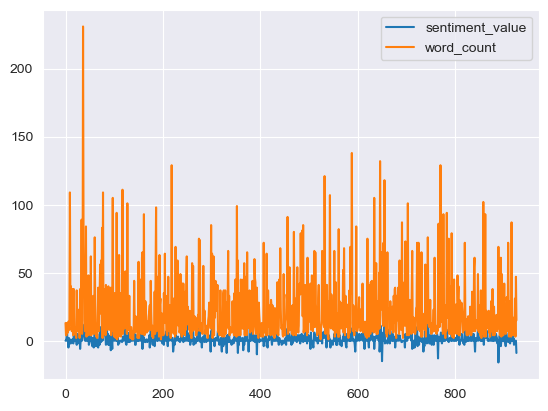

In [44]:
sent_df.plot()

In [45]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-5,14
8,Tweets definitely do not represent real-world ...,0,8
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11
923,"It may never pay out, as the stock cant b ht...",-2,31
924,Details Aug 28.,0,3
925,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47


In [46]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,2,4
3,@gtera27 Doge is underestimated @teslacn Congr...,8,13
5,Happy New Year of the Ox!,2,6
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,1,109
...,...,...,...
912,Mass Effect 2 (talking about sequels) is amazing.,4,8
914,He was one of the very best.,2,7
916,"@Ali_Afshari In general, we need to improve ho...",2,87
918,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",5,15


In [47]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,2,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,8,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11,922
923,"It may never pay out, as the stock cant b ht...",-2,31,923
924,Details Aug 28.,0,3,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,925


/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_94731/527296752.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

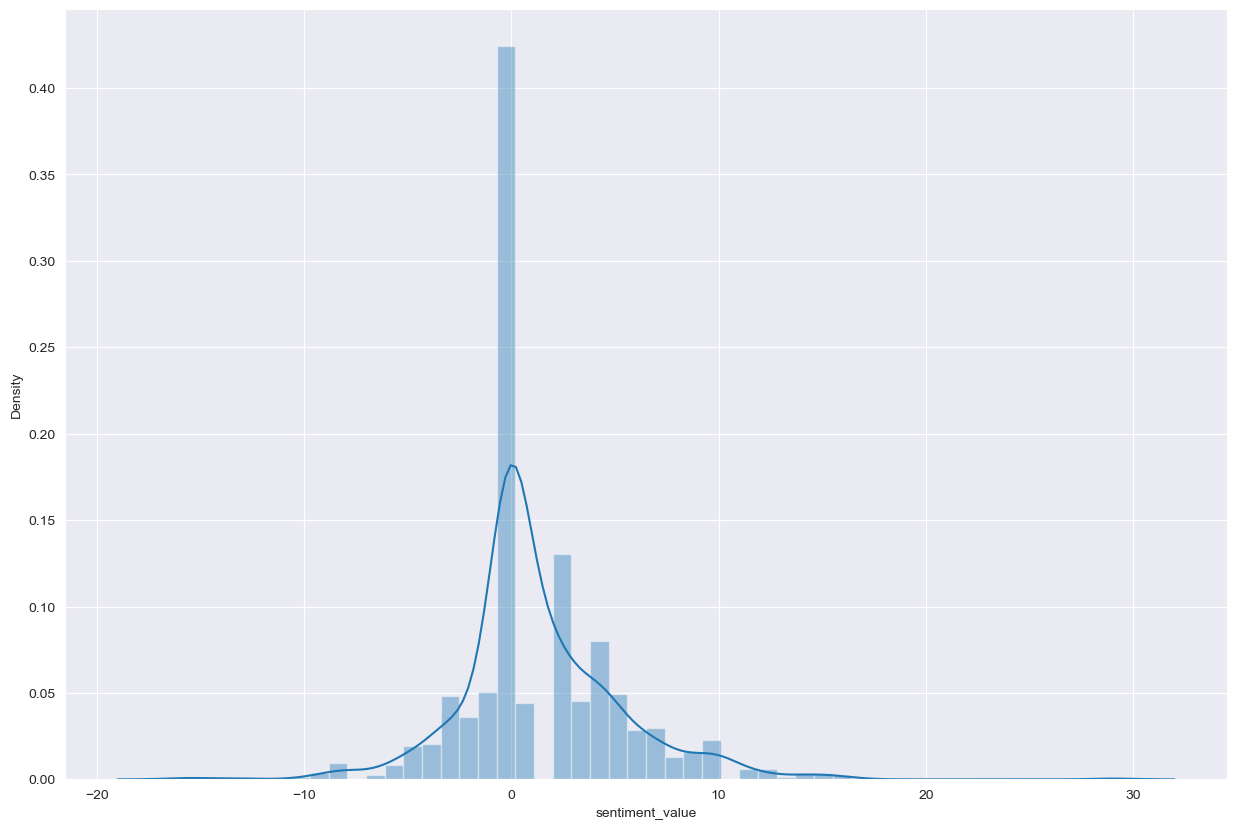

In [48]:
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

In [49]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,2,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,8,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11,922
923,"It may never pay out, as the stock cant b ht...",-2,31,923
924,Details Aug 28.,0,3,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,925


<Axes: xlabel='index', ylabel='sentiment_value'>

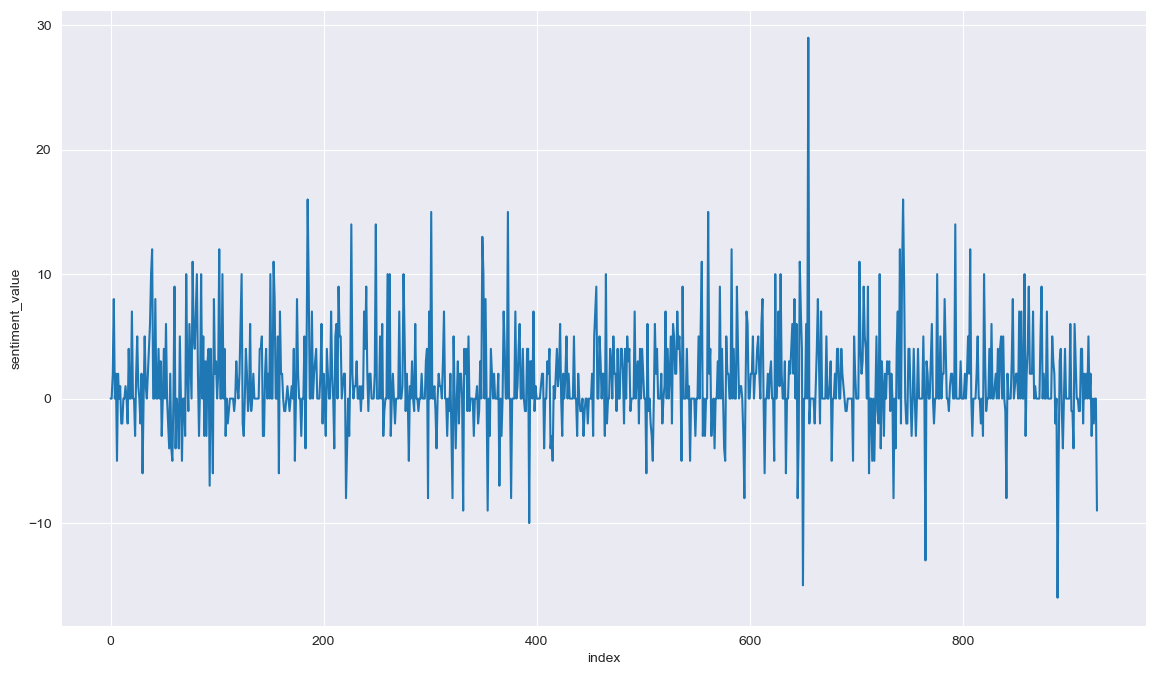

In [50]:
plt.figure(figsize=(14,8))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

Text(0, 0.5, 'Frequency')

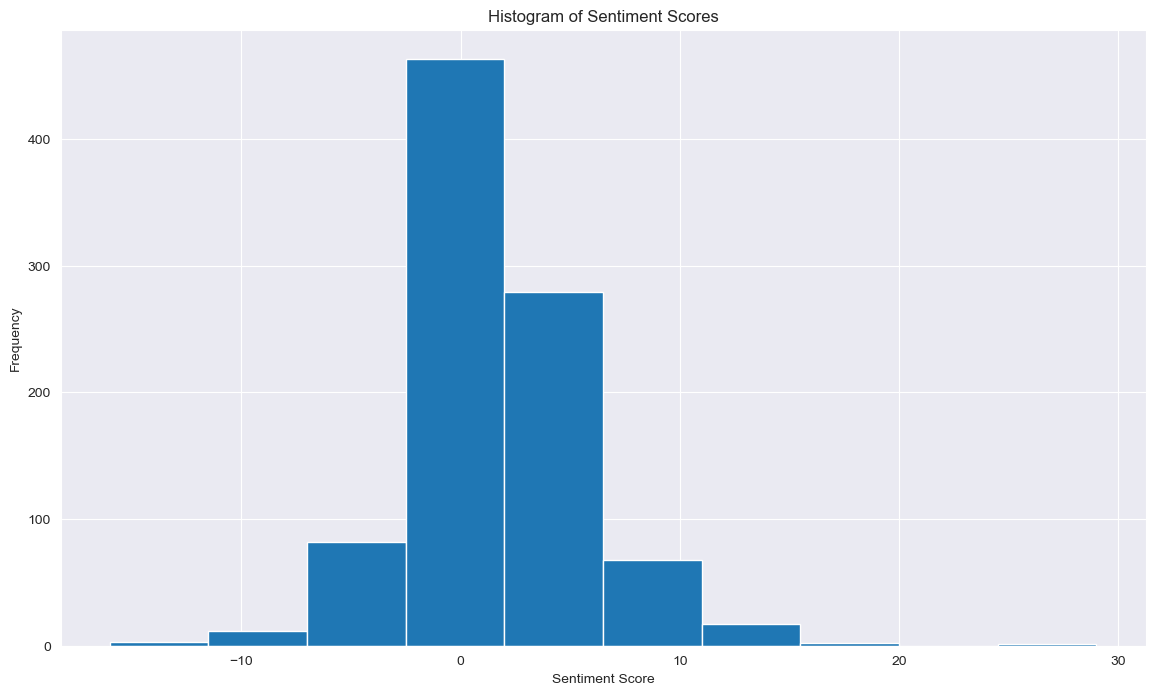

In [51]:
plt.figure(figsize=(14,8))
plt.hist(sent_df['sentiment_value'], bins=10)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

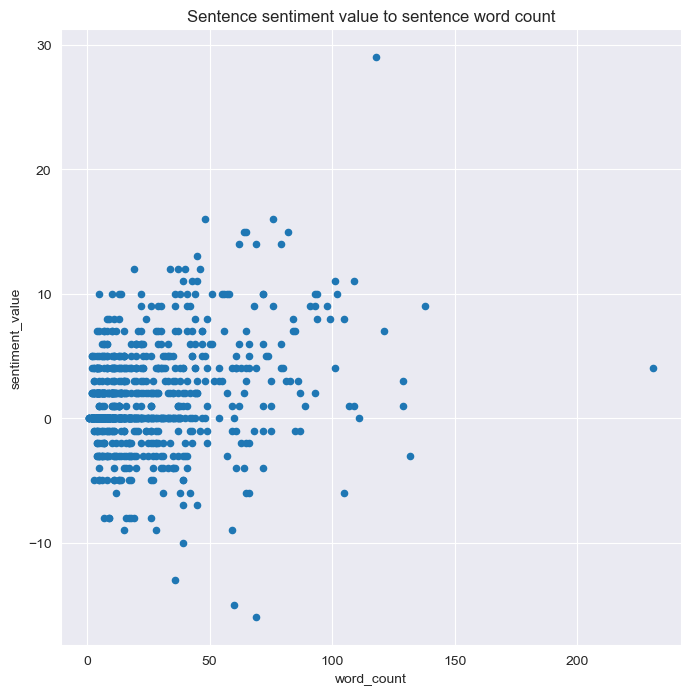

In [52]:


plt.rcParams['figure.figsize'] = [8, 8]
# Scatter plot of sentence sentiment value vs sentence word count
sent_df.plot.scatter(x='word_count', y='sentiment_value', title='Sentence sentiment value to sentence word count')
plt.show()


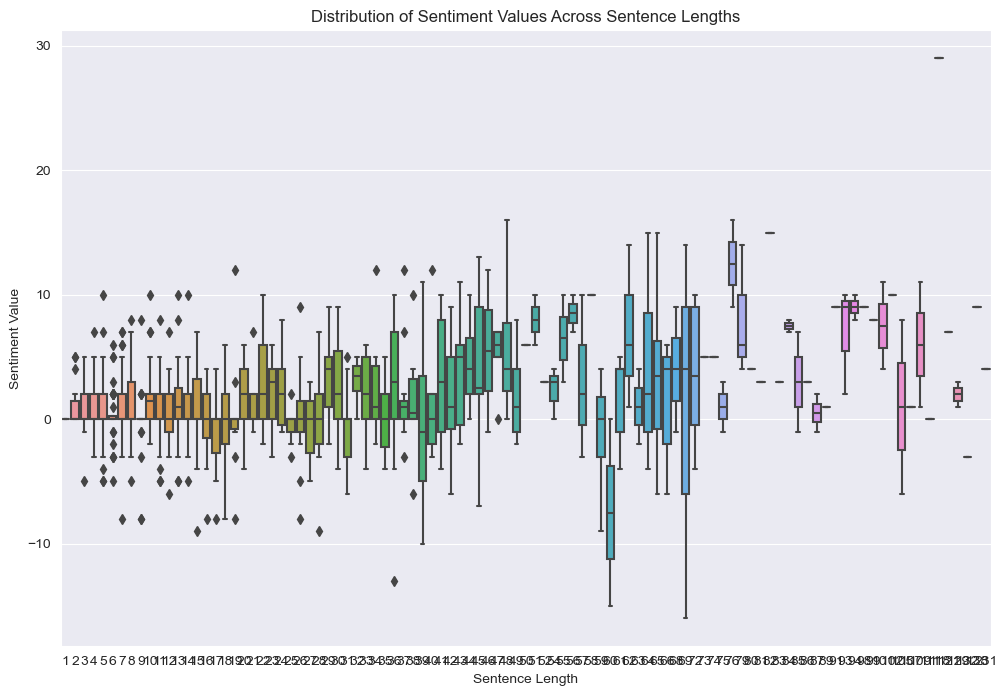

In [53]:
#This plot can help visualize if there's any correlation between sentence length and sentiment value
sent_df['sentence_length'] = sent_df['sentence'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 8))
sns.boxplot(x='sentence_length', y='sentiment_value', data=sent_df)
plt.title('Distribution of Sentiment Values Across Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Sentiment Value')
plt.show()

Text(23.125000000000014, 0.5, 'Sentiment Value')

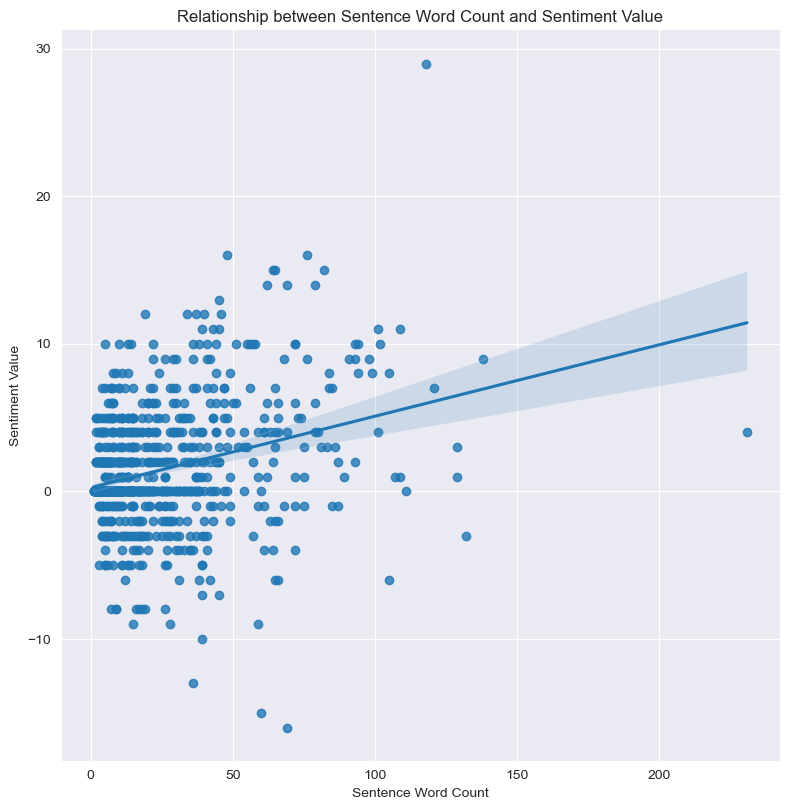

In [54]:
#a scatter plot with a regression line that shows the relationship between sentence word count and sentiment value.

sns.lmplot(x='word_count', y='sentiment_value', data=sent_df, height=8)
plt.title('Relationship between Sentence Word Count and Sentiment Value')
plt.xlabel('Sentence Word Count')
plt.ylabel('Sentiment Value')

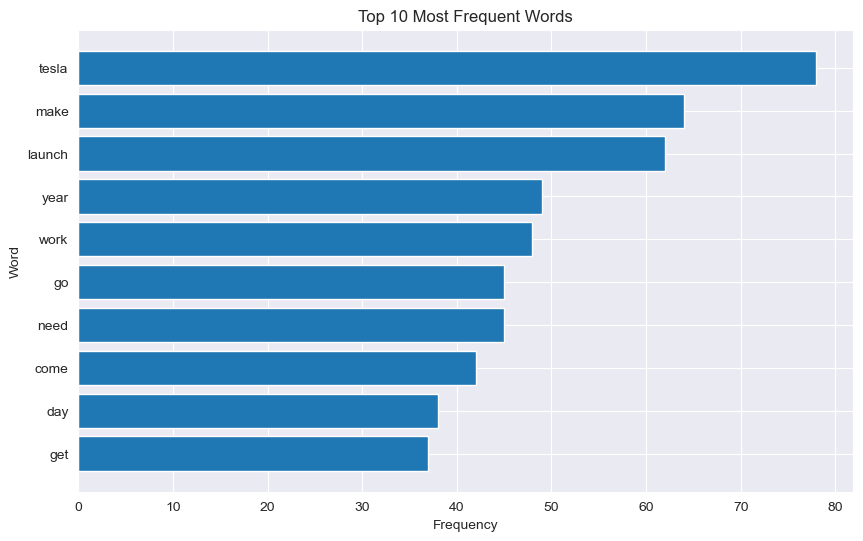

In [55]:
#This code generates a horizontal bar chart showing the top 10 most frequent words in the text,
freq_df = wd_df.nlargest(10, 'count')
plt.figure(figsize=(10, 6))
plt.barh(freq_df['word'], freq_df['count'])
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis()
plt.show()


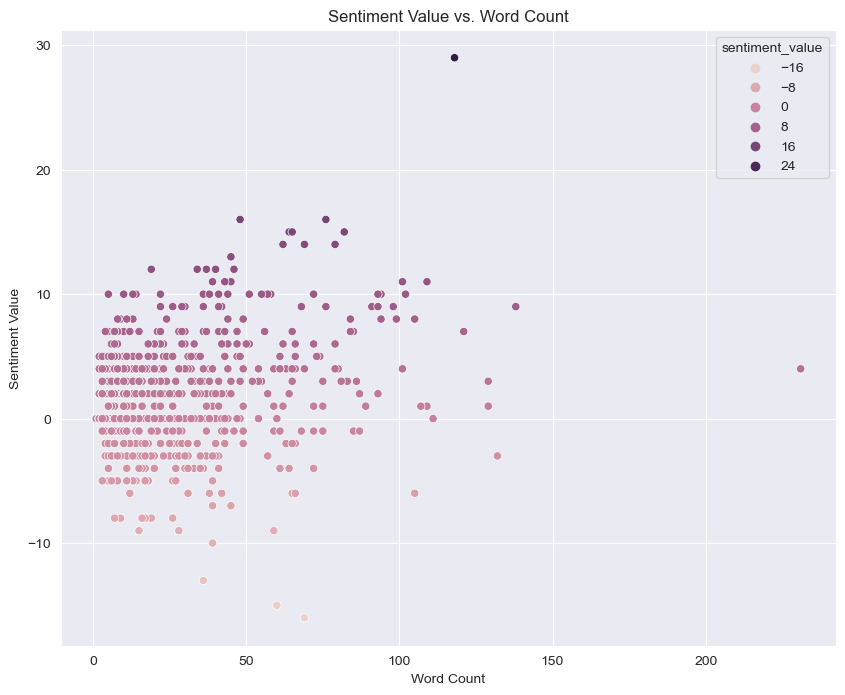

In [56]:
#plot gives a visual representation of the relationship between sentence length and sentiment.

sns.set_style('darkgrid')
sns.set_palette('husl')

plt.figure(figsize=(10, 8))
sns.scatterplot(x='word_count', y='sentiment_value', hue='sentiment_value', data=sent_df)
plt.title('Sentiment Value vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Value')
plt.show()
